In [1]:
# 연습

#### 패키지 불러오기

In [2]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# 로지스틱 분석 패키지
from statsmodels.api import Logit

# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

## 데이터 구성하기

In [3]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/HMEQ.csv', encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


## 데이터 전처리

#### 결측치 처리

In [4]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
3743    0
3744    0
3745    0
3746    0
3747    0
Length: 3748, dtype: int64

In [6]:
df_raw['JOB'].unique()

array(['Other', 'Office', 'Mgr', 'ProfExe', 'Self', 'Sales', nan],
      dtype=object)

In [7]:
df_raw.dtypes

BAD          int64
LOAN         int64
MORTDUE      int64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG        int64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO         int64
DEBTINC    float64
dtype: object

In [8]:
# fillna: 결측치 대체 함수
# JOB 변수의 결측치는 "Other"로 대체, inplace: fillna 함수 적용 후 df_raw 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: df_raw.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

In [9]:
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### 데이터 분할

In [10]:
# train_test_split(데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train, df_test = train_test_split(df_raw, # 데이터
                                     test_size = 0.3, # test 데이터의 비율
                                     random_state = 1234)  # random state

print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


In [11]:
print(df_train["JOB"].unique())
print(df_train["REASON"].unique())

['Office' 'ProfExe' 'Other' 'Mgr' 'Self' 'Sales']
['DebtCon' 'HomeImp']


## 로지스틱 회귀모델 및 회귀계수 검토

In [12]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”
log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) \
+ C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                  0.2257
Time:                        15:44:10   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [13]:
import math
math.exp(1.1323)

3.102784704367528

In [14]:
math.exp(-0.0080)

0.9920319148370607

In [15]:
math.exp(0.1097)

1.115943237265224

In [16]:
df_train['JOB'].unique()

array(['Office', 'ProfExe', 'Other', 'Mgr', 'Self', 'Sales'], dtype=object)

In [17]:
df_train["REASON"].unique()

array(['DebtCon', 'HomeImp'], dtype=object)

In [18]:
math.exp(-0.8256)

0.4379721303359948

## 예측 및 성능 평가

#### 예측

In [19]:
# test 데이터 예측
y_pred = log_result.predict(df_test)
print(y_pred.head())
print(y_pred[1721])

1721    0.103803
822     0.028356
1686    0.360934
789     0.007546
165     0.146117
dtype: float64
0.1038025801364287


In [20]:
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int64

In [21]:
y_pred.head()

1721    0.103803
822     0.028356
1686    0.360934
789     0.007546
165     0.146117
dtype: float64

#### 평가

In [22]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_class)))

Accuracy: 0.924

Confusion Matrix: 
[[1017    4]
 [  81   23]]


In [23]:
df_test.groupby(["BAD"]).count()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,,,,,,,,,,,,
0,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021
1,104,104,104,104,104,104,104,104,104,104,104,104


## 결론 도출

<AxesSubplot:>

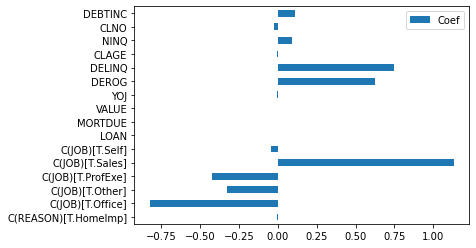

In [24]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")


In [25]:
import math
math.exp(1.1323)

3.102784704367528

#### 표준화 회귀 계수

In [26]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

# Data Scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled = pd.concat([df_numeric_scaled, df_char],axis = 1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [27]:
# BAD 데이터를 0과 1로 변환, np.where(조건, 조건을 만족하는 경우, 만족하지 않는 경우)
df_scaled["BAD"] = np.where(df_scaled["BAD"]> 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [28]:
df_scaled["BAD"].head()
df_raw["BAD"].head()
df_scaled["BAD"] == df_raw["BAD"]
print(df_raw["BAD"].sum())
print(df_scaled["BAD"].sum())

345
345


In [29]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled, # 데이터
                                                   test_size = 0.3, # test 데이터의 비율
                                                   random_state = 1234)  # random state

In [30]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC"
                                      , df_scaled_train)
# 적합
scaled_log_result = scaled_log_model.fit()
# 결과 출력
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                  0.2257
Time:                        15:44:11   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

<AxesSubplot:>

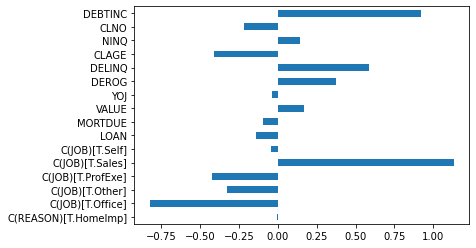

In [31]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)